## 1. Getting started

### Installing the prereq.

If you have not already, you will need to install python. I recommend using [Anaconda](https://www.anaconda.com/products/individual).

To get started we will need to install and import the 4 main packages used within this tutorial:
1. Numpy
2. MatplotLib
3. [pyABF](https://github.com/swharden/pyABF) by Scott Harden
4. [ipfx](https://github.com/AllenInstitute/ipfx) from the Allen Institute

these can be installed using pip. For example:

``` pip install ipfx ```

### Importing our packages and loading our data

To begin with we will import our necessary packages:

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pyabf
import ipfx

Loading our data is as simple as a single command! I have provided an example data file (excuse the noisy recording). However feel free to excute this notebook locally with your own abf files!

In [13]:
abf = pyabf.ABF("data/example1.abf") #this tells pyabf to load our data and store it in an abf object

This loads our data as an python object. 
Now, we can simple access the various data of the abf file by access the objects attributes. 
In python these are accessed by using the 
` abf.<something> ` conventions

In [14]:
### ABF metadata is loaded with the file. This can be accessed using the ABF objects properties
file_id = abf.abfID
sampling_rate = abf.dataRate
sweeps = abf.sweepCount

print(f"Loaded abf file {file_id} with sampling rate {sampling_rate}hz, and {sweeps} sweeps")

Loaded abf file example1 with sampling rate 20000hz, and 15 sweeps


We can also view a full list of all the data available to us:

In [15]:
dir(abf)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adcSection',
 '_cacheStimulusFiles',
 '_dacSection',
 '_dataGain',
 '_dataOffset',
 '_dtype',
 '_epochPerDacSection',
 '_epochSection',
 '_fileGUID',
 '_fileSize',
 '_headerV2',
 '_ide_helper',
 '_loadAndScaleData',
 '_makeAdditionalVariables',
 '_nDataFormat',
 '_preLoadData',
 '_protocolSection',
 '_readHeadersV1',
 '_readHeadersV2',
 '_sectionMap',
 '_stringsIndexed',
 '_stringsSection',
 '_sweepBaselinePoints',
 '_synchArraySection',
 '_tagSection',
 'abfDateTime',
 'abfDateTimeString',
 'abfFileComment',
 'abfFilePath',
 'abfFolderPath',
 'abfID',
 'abfVersion',
 'abfVersionString',
 'adcNames',
 'adcUnits',
 'chan

### Getting the Sweeps

The actual data is stored in the abf.Data property. However the data is not separated by sweep, and is stored continuously.

In [16]:
print(abf.data)
print(abf.data[0].shape[0])

[[-71.8384 -72.052  -71.9299 ... -68.6035 -68.3289 -68.5425]]
1500000


To make it easy to select a specific sweep pyABF provides a ` abf.setSweep(x) ` attribute. Once setting a specific sweep, data can be accessed using `abf.sweepX, abf.sweepY, abf.sweepC` whereas X is the time, Y is the response, and C is the command. 
Lets plot a single sweep:

Text(0, 0.5, 'Applied Current (pA)')

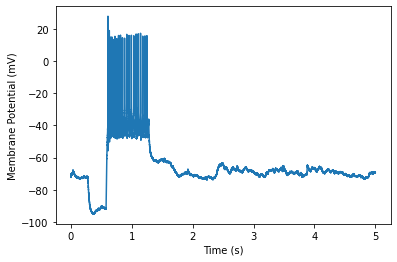

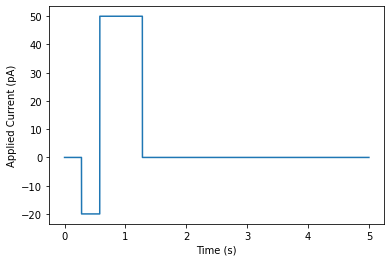

In [17]:
abf.setSweep(7)
sweepX = abf.sweepX
sweepY = abf.sweepY
sweepC = abf.sweepC
#Create a figure
plt.figure(1)
plt.plot(sweepX, sweepY)
plt.xlabel("Time (s)")
plt.ylabel(abf.sweepLabelY) #note we can pull the label from here
# We could also use abf.sweepUnitsY # This can be helpful in determining Clamp mode programmatically!
#create a second figure to show the command waveform
plt.figure(2)
plt.plot(sweepX, sweepC)
plt.xlabel("Time (s)")
plt.ylabel(abf.sweepLabelC)


To access each sweep we can use a for loop. To do so, I recommend using `abf.sweepList` which provides a numerical iter for each possible sweep (helps to ensure you don't iter out of range)

Text(0, 0.5, 'Membrane Potential (mV)')

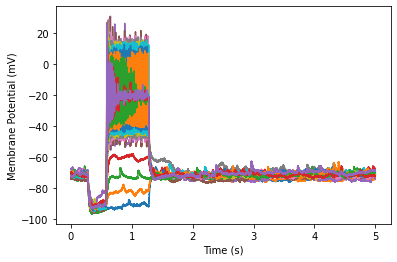

In [18]:
for sweepNumber in abf.sweepList: #steps through each sweep
  abf.setSweep(sweepNumber) #Set the sweep to that number
  plt.plot(abf.sweepX, abf.sweepY) # and plot the sweeps
plt.xlabel("Time (s)")
plt.ylabel(abf.sweepLabelY)

Now that we can open and view our data, lets find some spikes!